# Use and Remove Seasonaity ins time series data

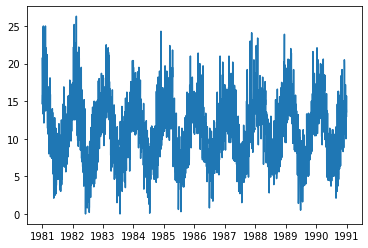

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

series = pd.read_csv("datasets/daily-minimum-temperatures.csv", index_col=0, parse_dates = True, squeeze = True)
plt.plot(series)
plt.show()

We can see that there is seasonal componet each year swing from summer to winter

## Seasonal Adjustment with Differencing

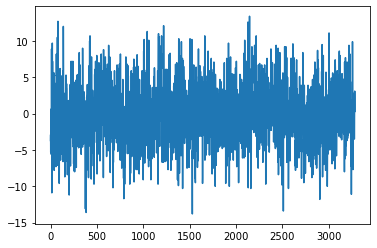

In [2]:
# Because we have a seasonal component each year:
days_in_year = 365
X = series.values
diff = list()

for i in range(days_in_year, len(X)):
    diff.append(X[i] - X[i - days_in_year])

plt.plot(diff)
plt.show()

Because there are 2 leap years in the dataset, we can resample the dataset to monthly instead of daily

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
1981-06-30     7.306667
1981-07-31     7.577419
1981-08-31     7.238710
1981-09-30    10.143333
1981-10-31    10.087097
1981-11-30    11.890000
1981-12-31    13.680645
1982-01-31    16.567742
1982-02-28    15.921429
1982-03-31    14.935484
1982-04-30    11.470000
1982-05-31     9.583871
1982-06-30     5.606667
1982-07-31     4.641935
1982-08-31     7.903226
1982-09-30     7.280000
1982-10-31     9.545161
1982-11-30    12.486667
1982-12-31    13.754839
1983-01-31    13.180645
1983-02-28    16.807143
1983-03-31    15.777419
1983-04-30    10.596667
1983-05-31    10.116129
1983-06-30     6.600000
1983-07-31     6.890323
1983-08-31     8.706452
Freq: M, Name: Temp, dtype: float64


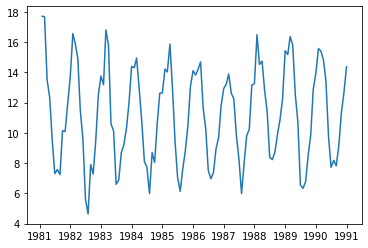

In [3]:
# resample to monthly
monthly = series.resample('M')
monthly_mean = monthly.mean()

print(monthly_mean.head(32))
plt.plot(monthly_mean)
plt.show()

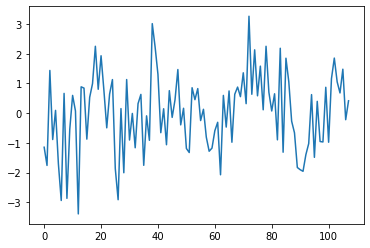

In [4]:
# Now we can deseason
month_in_year = 12
diff = list()
for i in range(month_in_year, len(monthly_mean)):
    diff.append(monthly_mean[i] - monthly_mean[i - month_in_year])

plt.plot(diff)
plt.show()


Next, we can use the monthly average minimum temperatures from the same month in the previous year to adjust the daily minimum temperature dataset.

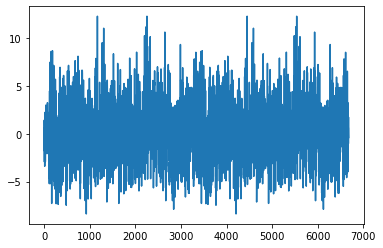

In [6]:
for i in range(days_in_year, len(X)):
	month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
	month_mean_last_year = series[month_str].mean()
	value = X[i] - month_mean_last_year
	diff.append(value)
plt.plot(diff)
plt.show()

## Seasonal Adjustment with Modeling

In [12]:
# Unlike in Detrending, we will need a polymonial function to predict the seasonality
from numpy import polyfit

# X will be the time index: 1,2,3...365
X = [i%365 for i in range(len(series))]
# y will be the observations:
y = series.values

# Train model with the prediction function having the degree of 4:
degree = 4
coef = polyfit(X, y, degree)
print(coef)
print(coef[:-1])


[-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]
[-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01]


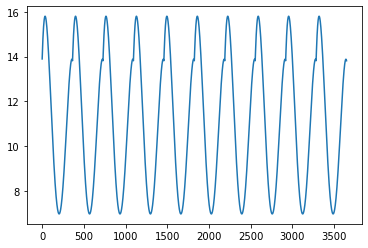

In [20]:
# Predict the seasonality
seasonality = list()
for i in range(len(series)):
    # yhat = b + a1*x^4 + a2*x^3 + a3*x^2 + a4*x^1
    seasonal_value = coef[-1]
    for d in range(1, degree+1):
        seasonal_value += coef[degree - d] * X[i]**d
    seasonality.append(seasonal_value)
# Plot the calculated
plt.plot(seasonality)
plt.show()

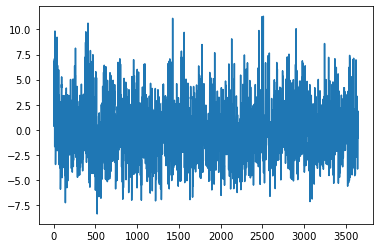

In [23]:
# Adjust the dataset with the predicted seasonality
adjusted = list()
for i in range(len(series)):
    value = series.values[i] - seasonality[i]
    adjusted.append(value)
plt.plot(adjusted)
plt.show()